<a href="https://colab.research.google.com/github/danifeerrer/cancer_diagnosis/blob/main/cancer_diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. LOOKING THE DATA**





In [1]:
import pandas as pd

cancer_df = pd.read_csv('./drive/MyDrive/project3_data.csv')
cancer_df.head()

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
cancer_df.isnull().sum()

id                         0
diagnosis                  0
Radius_mean                0
Texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [3]:
X = cancer_df
y = cancer_df['diagnosis']
X = X.drop(columns=["diagnosis"])

**2. VISUALIZING THE DATA**

<Axes: xlabel='diagnosis', ylabel='count'>

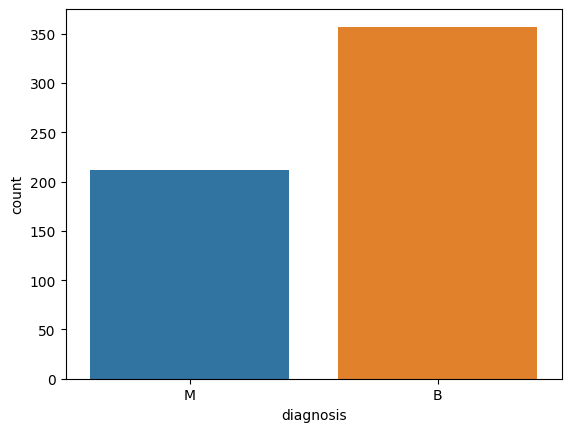

In [4]:
import seaborn as sns

sns.countplot(x="diagnosis", data=cancer_df)

In [5]:
print(cancer_df.diagnosis.value_counts())

B    357
M    212
Name: diagnosis, dtype: int64


The class M is less represented than the class B. This could lead the model to become biased toward the majority class. To equalize the number of M and B classes, we can use an oversampling technique called SMOTE. SMOTE will generate syntheticate samples for the minority class

In [9]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(sampling_strategy='minority', random_state=1)
X_smote, y_smote = sm.fit_resample(X,y)
print(Counter(y_smote))

Counter({'M': 357, 'B': 357})
714


<Axes: xlabel='diagnosis', ylabel='count'>

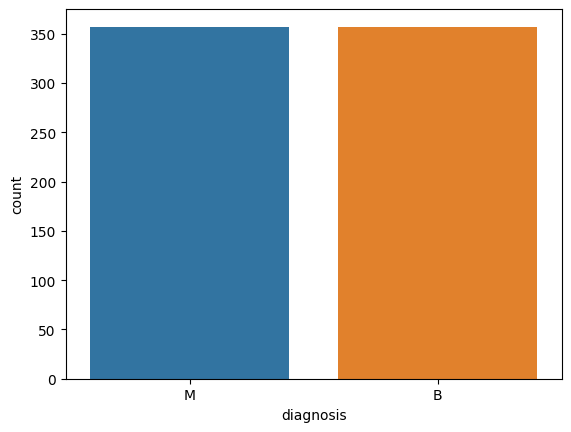

In [7]:
smoted_cancer_df = X_smote.copy()
smoted_cancer_df["diagnosis"] = y_smote

sns.countplot(x="diagnosis", data=smoted_cancer_df)

**2.1 Scaling the Data**



Many machine learning algorithms are sensitive to the scale of features. Features with larger magnitudes may dominate those with smaller magnitudes, potentially leading the algorithm to give more importance to the larger-magnitude features

In [10]:
from sklearn import preprocessing

cols = X_smote.columns
scale_smote = pd.DataFrame(preprocessing.scale(X_smote), columns=cols)
print(scale_smote)

           id  Radius_mean  Texture_mean  perimeter_mean  area_mean  \
0   -0.237089     0.907258     -2.235383        1.072484   0.806009   
1   -0.237087     1.631735      0.477815        1.482974   1.718810   
2    0.451435     1.384626      0.353947        1.365111   1.373350   
3    0.451826    -0.937630      0.146705       -0.765375  -0.921011   
4    0.451909     1.553109     -1.292076        1.572388   1.637360   
..        ...          ...           ...             ...        ...   
709 -0.236390     0.816679      2.060373        0.828062   0.709629   
710 -0.243290     2.062914      0.726173        2.047049   2.324399   
711 -0.171336     0.177889      0.310034        0.160899   0.035872   
712 -0.236755     1.191203      0.159540        1.132033   1.164952   
713 -0.169688     1.703373      0.190244        1.680522   1.688511   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           1.563604          3.046195        2.427106             2

**3. Splitting the Data into Training and Testing**

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scale_smote, y_smote,
                                                    test_size=0.2, random_state=42)

print("Training set has {} samples".format(X_train.shape[0]))
print("Testing set has {} samples".format(X_test.shape[0]))

Training set has 571 samples
Testing set has 143 samples


**4. Random Forest Classifier**

I choosed Random Forest because it tends to have high a predictive accuracy and it can capture complex relationships in the data.

In [12]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(random_state=42)

randomForest = randomForest.fit(X_train, y_train)

predictions_test = randomForest.predict(X_test)

**5. Calculating Prediction Accuracy**

**5.1 F1 score**

In [16]:
from sklearn.metrics import f1_score

pos_label = 'M'

y_test_binary = [1 if label == pos_label else 0 for label in y_test]
predictions_test_binary = [1 if label == pos_label else 0 for label in predictions_test]

f1 = f1_score(y_test_binary, predictions_test_binary)
print(f"F1 score: {f1}")

F1 score: 0.972972972972973


**5.2 Precision**

In [17]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions_test)
print("Precision: ", (accuracy * 100).round(2),  "%")

Precisión:  97.2 %


**5.3 Recall**

In [19]:
from sklearn.metrics import recall_score

recall = recall_score(y_test_binary, predictions_test_binary)
print(f"Recall: {recall}")

Recall: 0.972972972972973


**5.4 ROC Curve**

AUC-ROC: 0.971993732863298


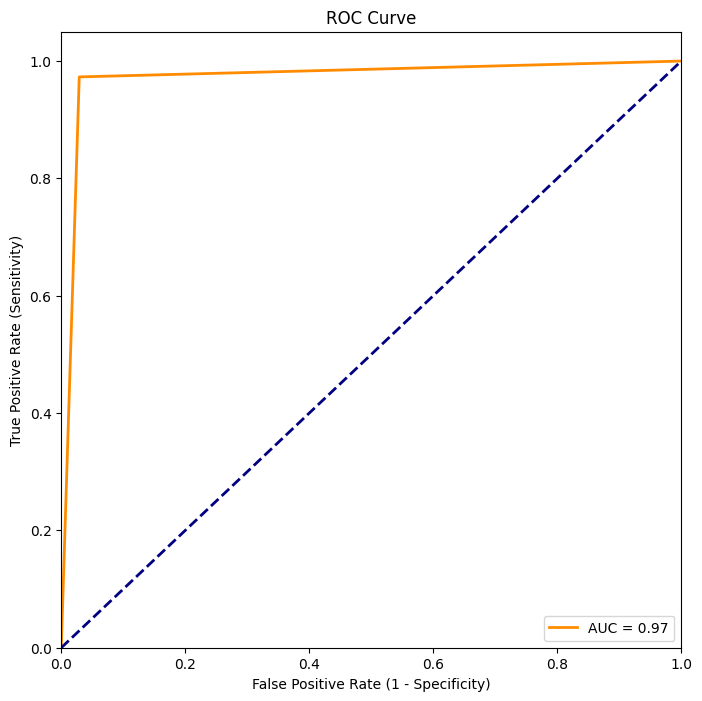

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test_binary, predictions_test_binary)

roc_auc = auc(fpr, tpr)
print(f"AUC-ROC: {roc_auc}")

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

**6. Extra Trees Classifier**

I choosed the Extra Trees Classifier algorithm because it doesn't require a lot of computational power, and it's suitable for handling noisy data and large datasets.


In [64]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scale_smote, y_smote, test_size=0.2, random_state=42)

extra_trees_model = ExtraTreesClassifier(n_estimators=100, random_state=42)

extra_trees_model.fit(X_train, y_train)

y_pred_extra_trees = extra_trees_model.predict(X_test)


**7. Calculating Prediction Accuracy**


In [65]:
accuracy_extra_trees = accuracy_score(y_test, y_pred_extra_trees)
print(f"Accuracy: {accuracy_extra_trees:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred_extra_trees))

Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        69
           M       0.99      0.97      0.98        74

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

